In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = 'dataset/filtered_train_14_15.csv'

In [3]:
df = pd.read_csv(file_path)
n_clusters = 50

In [4]:
# Select only the relevant columns
coordinates_df = df[['pickup_longitude', 'pickup_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
df['location_pickup'] = kmeans_pickup.fit_predict(coordinates_df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
centroids_pickup = kmeans_pickup.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_pickup = kmeans_pickup.labels_

# Initialize an empty dictionary to store clusters
clusters_pickup = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_pickup):
    label = idx  # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_pickup == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_pickup[label] = cluster_indices
#clusters_pickup

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


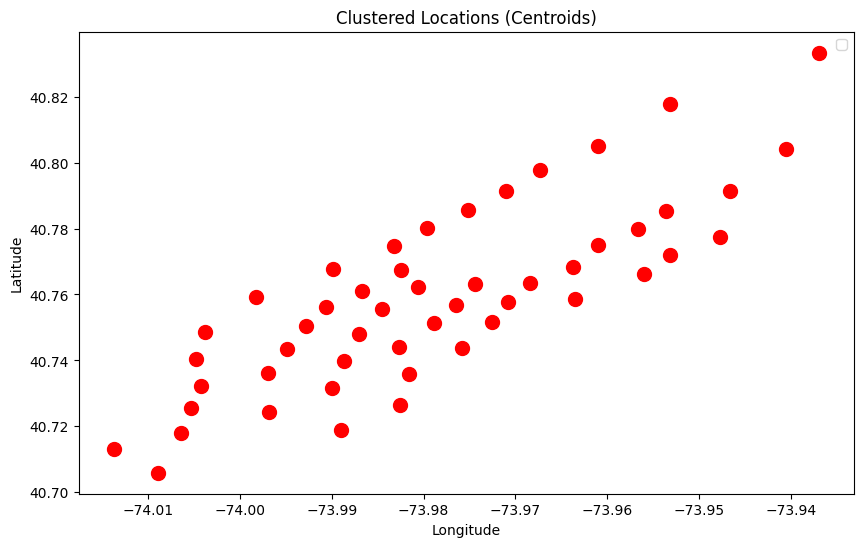

In [6]:
# Display information or perform further analysis on each location as needed
#for location_id in range(100):
#    location_subset = df[df['location'] == location_id]
#    print(f"Location {location_id} Subset:")
#    print(location_subset.head())
centroids_pickpup = kmeans_pickup.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=100, c='red')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [7]:
# Select only the relevant columns
coordinates_df = df[['dropoff_longitude', 'dropoff_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
df['location_dropoff'] = kmeans_dropoff.fit_predict(coordinates_df) + n_clusters


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_dropoff = kmeans_dropoff.labels_+n_clusters

# Initialize an empty dictionary to store clusters
clusters_dropoff = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_dropoff):
    label = idx + n_clusters # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_dropoff == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_dropoff[label] = cluster_indices
#clusters_dropoff

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


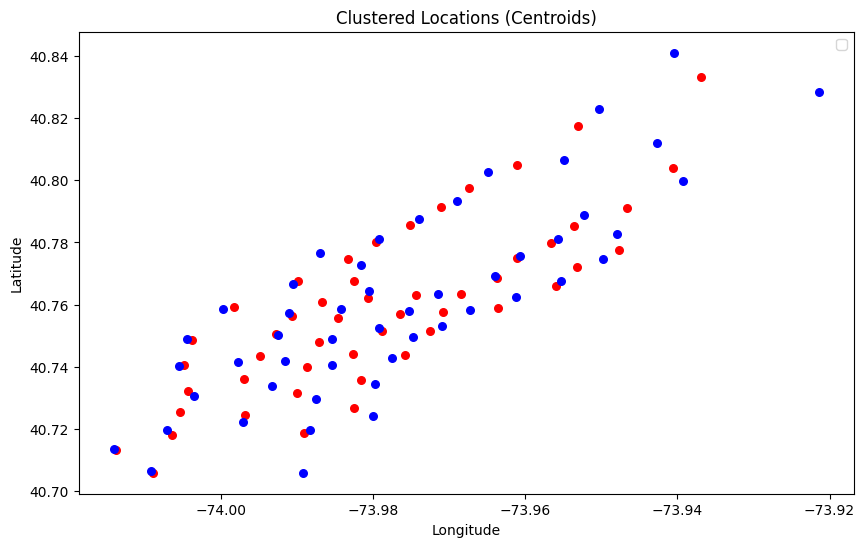

In [9]:
# Display information or perform further analysis on each location as needed
#for location_id in range(100):
#    location_subset = df[df['location'] == location_id]
#    print(f"Location {location_id} Subset:")
#    print(location_subset.head())
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='o', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [10]:
#Create arrays to store pickups
picked_up_pickup_indices = []
picked_up_dropoff_indices = []
radius = 0.0024

# Create arrays to store pickups
picked_up_indices = []
closest_pickup_indices = []  # Store indices of closest pickup point for each picked up dropoff centroid

# Iterate through each dropoff centroid
for dropoff_index, dropoff_centroid in enumerate(centroids_dropoff):
    # Assume initially it's a dropoff
    is_pickup = False
    closest_pickup_index = None  # Store the index of the closest pickup point
    min_distance = float('inf')  # Initialize minimum distance to infinity
    # Iterate through each pickup centroid
    for pickup_index, pickup_centroid in enumerate(centroids_pickpup):
        # Calculate the Euclidean distance between the centroids
        distance = np.linalg.norm(pickup_centroid - dropoff_centroid)
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            is_pickup = True
            if distance < min_distance:  # If this pickup is closer than the previous closest one
                min_distance = distance
                closest_pickup_index = pickup_index
    # If it's within the radius of any pickup, classify as pickup, else keep it as a dropoff
    if is_pickup:
        picked_up_indices.append(dropoff_index)
        closest_pickup_indices.append(closest_pickup_index)

# Convert to numpy array
picked_up_indices = np.array(picked_up_indices)
closest_pickup_indices = np.array(closest_pickup_indices)



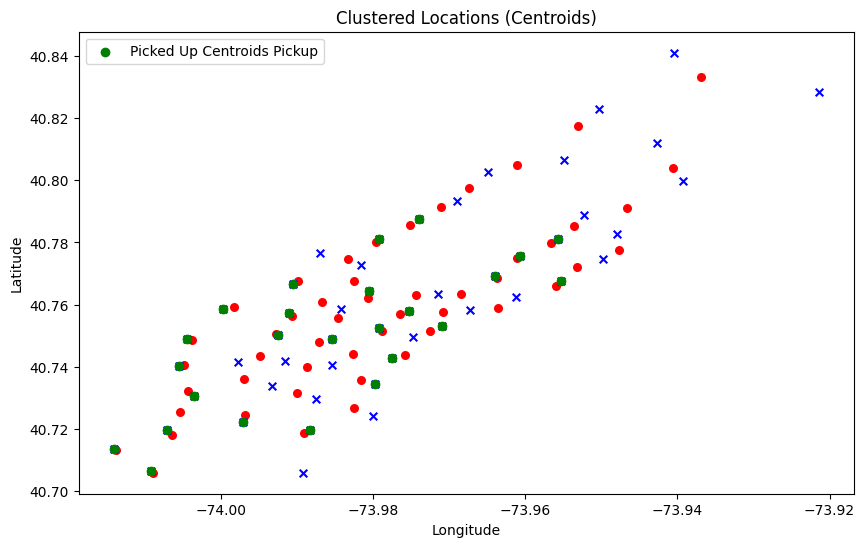

In [11]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='x', s=30, c='blue')
plt.scatter(centroids_dropoff[picked_up_indices, 0], 
            centroids_dropoff[picked_up_indices, 1], 
            color='green', label='Picked Up Centroids Pickup')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [12]:
centroids_dropoff_filtered = np.delete(centroids_dropoff, picked_up_indices, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


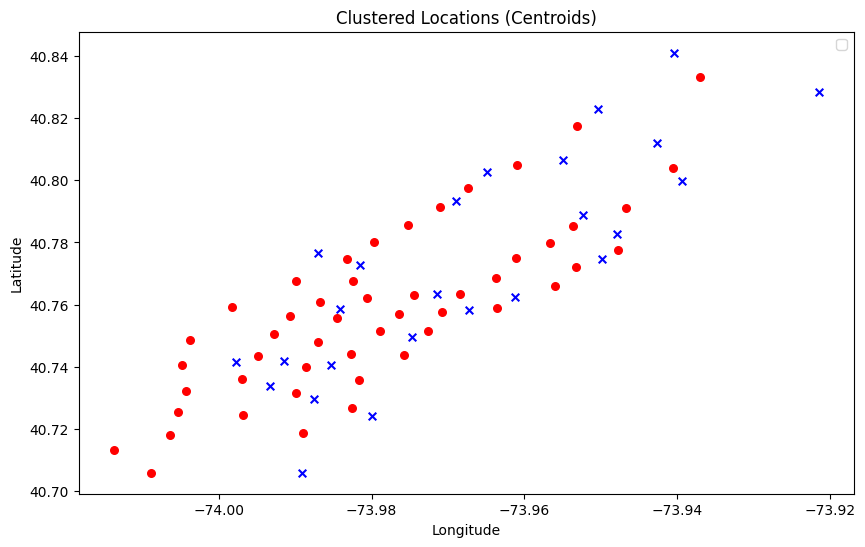

In [13]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [14]:
picked_up_indices

array([ 0,  1,  3,  4,  5,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 23,
       24, 27, 30, 32, 37, 41, 46, 47])

In [15]:
closest_pickup_indices

array([29,  0, 22, 10, 32, 35, 49, 13, 45,  4, 24, 12, 43,  6, 48, 46, 27,
       18,  7, 11, 26, 17, 19, 42, 25])

In [16]:
for i, idx in enumerate(picked_up_indices):
    print(n_clusters+idx, closest_pickup_indices[i])
    #print(centroids_dropoff[idx])
    df.loc[df['location_dropoff'] == idx + n_clusters, 'location_dropoff'] = closest_pickup_indices[i]

50 29
51 0
53 22
54 10
55 32
57 35
58 49
60 13
61 45
62 4
64 24
65 12
66 43
67 6
68 48
69 46
73 27
74 18
77 7
80 11
82 26
87 17
91 19
96 42
97 25


In [17]:
np.unique(df['location_dropoff'])

array([ 0,  4,  6,  7, 10, 11, 12, 13, 17, 18, 19, 22, 24, 25, 26, 27, 29,
       32, 35, 42, 43, 45, 46, 48, 49, 52, 56, 59, 63, 70, 71, 72, 75, 76,
       78, 79, 81, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 95, 98, 99],
      dtype=int32)

In [18]:
df.to_csv("dataset/filtered_train_14_15_w_location.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


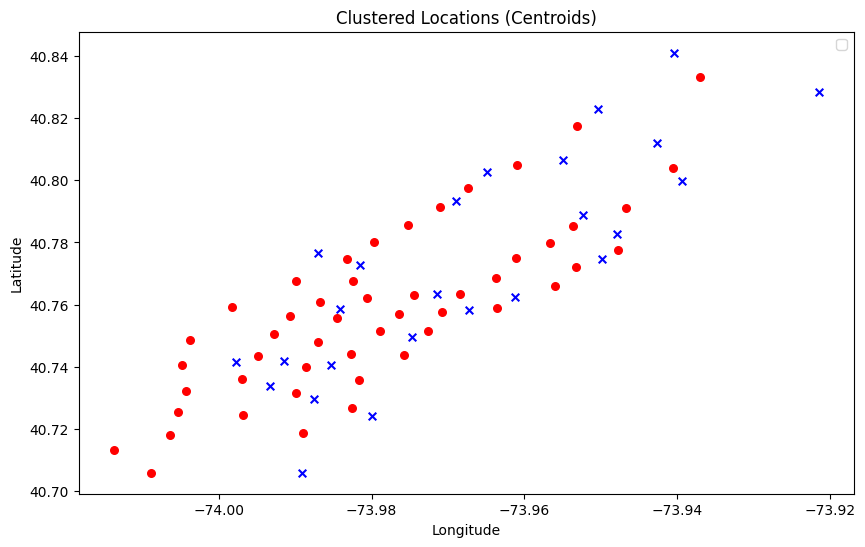

In [19]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [20]:
total_points = np.concatenate([centroids_pickpup, centroids_dropoff_filtered])

In [21]:
total_points

array([[-74.00484504,  40.74050749],
       [-73.96846014,  40.76352265],
       [-73.95359213,  40.78528311],
       [-73.98265909,  40.74416646],
       [-73.99687854,  40.7243087 ],
       [-73.98247113,  40.76747071],
       [-74.01374701,  40.71313569],
       [-73.99069255,  40.75632905],
       [-73.97100945,  40.79144923],
       [-73.95310402,  40.81761326],
       [-73.97576559,  40.74371291],
       [-73.955949  ,  40.76609541],
       [-73.97647264,  40.75689748],
       [-73.97966642,  40.78008778],
       [-73.99692333,  40.73612172],
       [-73.94662175,  40.79124641],
       [-73.98255425,  40.72655808],
       [-74.0089298 ,  40.70594602],
       [-73.96103553,  40.77493241],
       [-74.00426114,  40.73226905],
       [-73.96351621,  40.7587789 ],
       [-73.94055653,  40.80405271],
       [-73.96371081,  40.76847811],
       [-73.96101744,  40.8049842 ],
       [-73.98163344,  40.73573499],
       [-73.98705414,  40.74800452],
       [-73.99829772,  40.75932664],
 

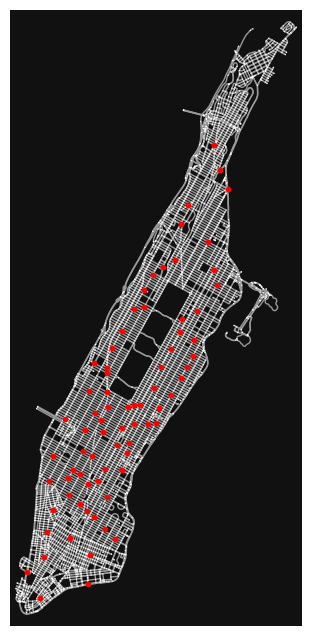

In [22]:
import osmnx as ox

# Retrieve the street network for Manhattan
graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive")

# Specify latitude and longitude coordinates
latitude = 40.7128  # Latitude of the location (e.g., New York City)
longitude = -74.0060  # Longitude of the location (e.g., New York City)
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color='r', s=10)
plt.show()


In [23]:

nearest_nodes = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in total_points:
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes.append(nearest_node)



# Initialize a list to store the routes
routes = []

# Calculate the routes between consecutive pairs of nearest nodes
for i in range(len(nearest_nodes) - 1):
    start_node = nearest_nodes[i]
    end_node = nearest_nodes[i + 1]
    route = ox.shortest_path(graph, start_node, end_node)
    routes.append(route)


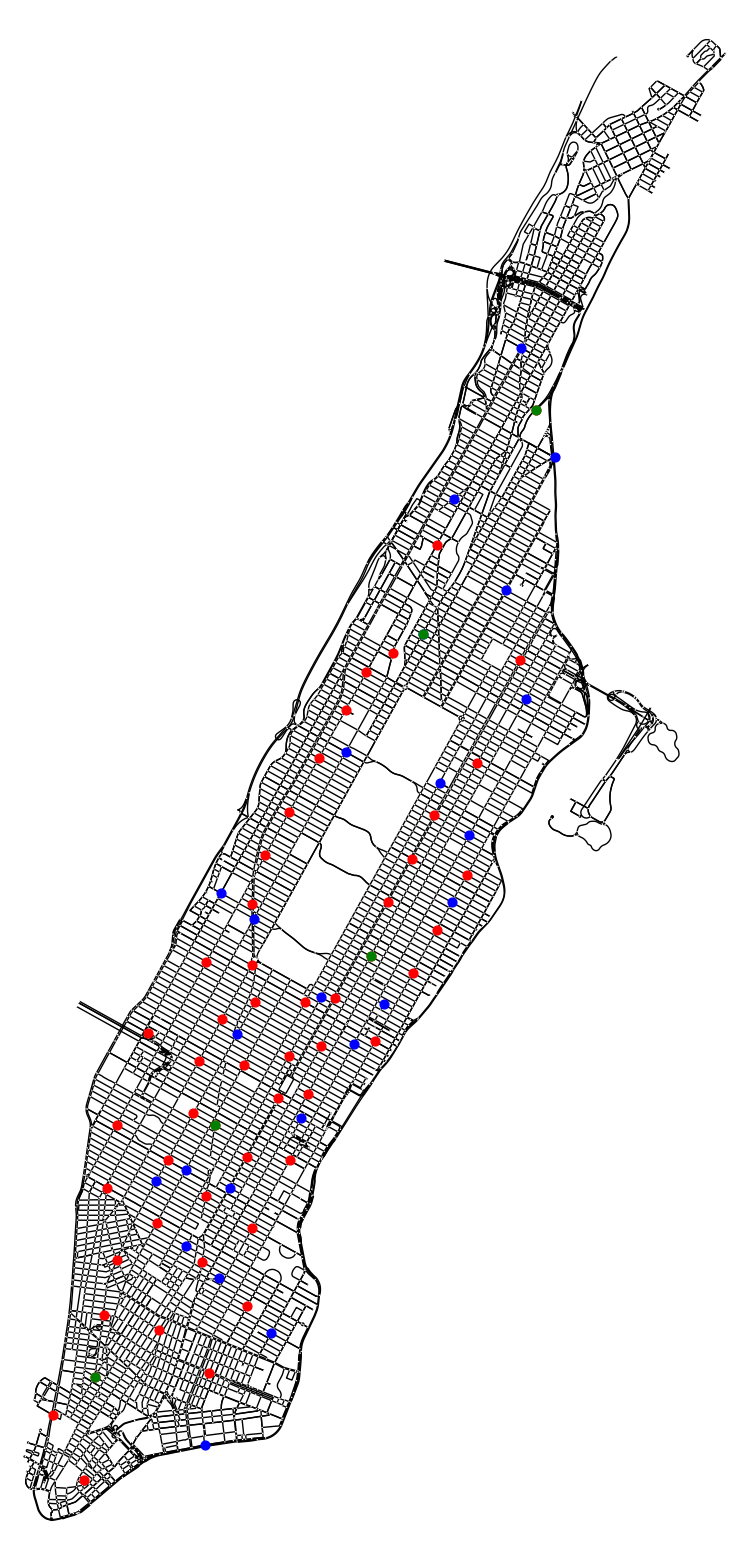

In [24]:
# Plot the street network with the calculated routes
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image.png')
color = 'r'
for idx,(longitude, latitude) in enumerate(total_points):
    if idx >len(centroids_pickpup):
        color = 'b'
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=40, alpha = 1)

# Extract latitude and longitude coordinates
latitudes = [point[1] for point in total_points]
longitudes = [point[0] for point in total_points]

# Find the range of latitude and longitude coordinates
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Divide the latitude and longitude range into 5 segments
lat_segments = np.linspace(lat_min, lat_max, num=6)
lon_segments = np.linspace(lon_min, lon_max, num=6)

# Find the middle point within each segment
contracted_points = []
for i in range(5):
    lat_middle = (lat_segments[i] + lat_segments[i+1]) / 2
    
    lon_middle = (lon_segments[i] + lon_segments[i+1]) / 2
    # Find the closest original point to this middle point
    closest_point_idx = np.argmin(np.linalg.norm(np.array(total_points) - [lon_middle, lat_middle], axis=1))
    closest_point = total_points[closest_point_idx]
    contracted_points.append(closest_point)
depots = []
for idx,(longitude, latitude) in enumerate(contracted_points):
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    depots += [nearest_node]
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color="g", s=40, alpha = 1)


#fig.dpi = 300
#fig.set_figheight(20)
#fig.set_figwidth(20)
fig.savefig("a.png",dpi=300, bbox_inches='tight')
#fig.show()

In [25]:
nearest_nodes2 = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in  sorted(list(total_points)+list(contracted_points), key=lambda point: point[1]):
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes2.append(nearest_node)

In [59]:
sorted_nodes = nearest_nodes2
len(sorted_nodes)  

80

In [66]:
# Connect the first few nodes
num_nodes_to_connect = 5  # Adjust this value as needed

# Calculate the routes between the connected nodes
routes2 = []
for i in range(len(sorted_nodes)):
    for ii in range(1, num_nodes_to_connect):
        start_node = sorted_nodes[i]
        idx = (i + ii) % len(sorted_nodes)  # Use modulo to wrap around to 0 when reaching the end
        end_node = sorted_nodes[idx]
        route = ox.shortest_path(graph, start_node, end_node)
        routes2.append(route)

In [27]:
plt.close()
fig, ax = ox.plot_graph_routes(graph, routes2, route_colors='orange', route_linewidth=1, node_size=1, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image_roads.png', node_color = "r", ax = ax, show = False)

In [67]:
import networkx as nx

# Initialize a new NetworkX graph
graph_from_routes = nx.DiGraph()

# Add nodes from the list of nearest nodes
for node in nearest_nodes:
    graph_from_routes.add_node(node, depot = False)

for node in depots:
    graph_from_routes.add_node(node, depot = True)
# Add edges from the list of routes
for route in routes2:
    start_node = route[0]
    end_node = route[-1]
    route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, route, 'length'))
    
    # Add weighted edge with route length as weight
    graph_from_routes.add_edge(start_node, end_node, weight=route_length)
    #if start_node not in depots and end_node not in depots:
    graph_from_routes.add_edge(end_node,start_node, weight=route_length)


/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_35411/4174975341.py:16: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, route, 'length'))


In [68]:
nx.write_gpickle(graph_from_routes, "graph_from_routes_wd.pkl")

In [48]:
pp_to_nn = {}
dp_to_nn = {}
a = []
for idx,point in enumerate(total_points):
    index = np.where(np.all(centroids_pickpup == point, axis=1))[0]
    if len(index)==0:
        index = np.where(np.all(centroids_dropoff == point, axis=1))[0]
        dp_to_nn[index[0] + n_clusters] = nearest_nodes[idx]
    else:
        pp_to_nn[index[0]] = nearest_nodes[idx]

In [40]:
pp_to_nn.items()

dict_items([(0, 42436439), (1, 6177439750), (2, 596776173), (3, 42445409), (4, 42458267), (5, 42435716), (6, 42453395), (7, 42435657), (8, 42442514), (9, 42434098), (10, 42442913), (11, 42429694), (12, 42445926), (13, 42442451), (14, 42429374), (15, 42447179), (16, 42434148), (17, 2824895141), (18, 42436914), (19, 5837088105), (20, 2711029280), (21, 596776659), (22, 42447076), (23, 42435360), (24, 42439178), (25, 6223969260), (26, 11252642361), (27, 42437305), (28, 42442286), (29, 42440012), (30, 42437890), (31, 42428192), (32, 42448162), (33, 42446994), (34, 42426665), (35, 42439440), (36, 42435680), (37, 42430338), (38, 42453104), (39, 42436922), (40, 42432818), (41, 42428598), (42, 486867459), (43, 42440966), (44, 42442557), (45, 561042200), (46, 42427483), (47, 42445748), (48, 42429330), (49, 42449948)])

In [41]:
dp_to_nn.items()

dict_items([(52, 42442567), (56, 42439490), (59, 42448254), (63, 42428978), (70, 42436578), (71, 42430989), (72, 42447404), (75, 11337295598), (76, 42444833), (78, 3892037906), (79, 42442959), (81, 9170816532), (83, 42443928), (84, 6744466013), (85, 42446521), (86, 42445950), (88, 42443381), (89, 42430271), (90, 42439994), (92, 42445256), (93, 42443052), (94, 3099326124), (95, 42447330), (98, 371337239), (99, 42439834)])

In [42]:
dict = pp_to_nn.copy()
dict.update(dp_to_nn)


In [43]:
df["pickup_graph_node"] = df["location_pickup"].map(dict)
df["dropoff_graph_node"] = df["location_dropoff"].map(dict)

In [44]:
df.isna().sum()

Unnamed: 0            0
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
location_pickup       0
location_dropoff      0
pickup_graph_node     0
dropoff_graph_node    0
dtype: int64

In [45]:
df.to_csv("dataset/finished_dataset.csv")